In [63]:

from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import ssapp.Utils as Utils
import seaborn as sns

from torch.utils.data.dataloader import DataLoader
import torch

import ssapp.data.AntennaDatasetLoaders as AntennaDatasets
from ssapp.models.NeuralNetworkModels.Autoencoders import PatchAntenna1ConvAutoEncoder
from ssapp.models.HelperFunctions import loadModel

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

AntennaDatasets.set_global_random_seed(42)

dataset = AntennaDatasets.load_serialized_dataset('CircularHornDataset1')




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


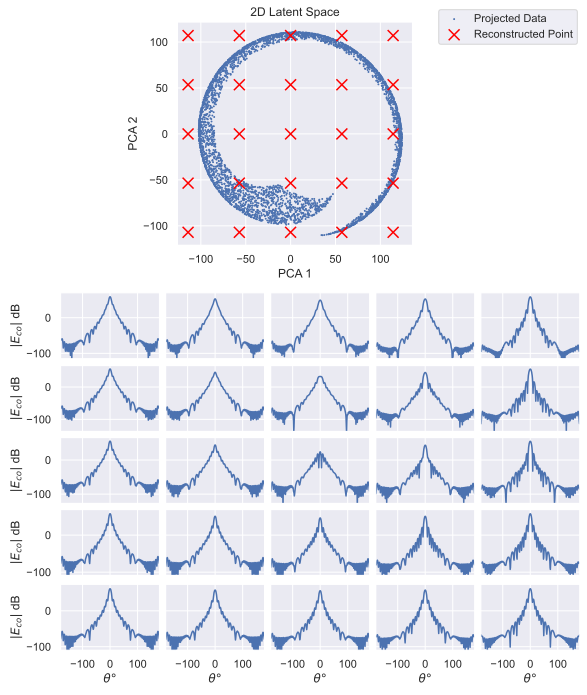

In [150]:
from ssapp.visualization import PCA_Visualisation

from ssapp.visualization.PCA_Visualisation import plotInverseTransformStandardPCA


plotInverseTransformStandardPCA(dataset,component='co',pca_components = [1,2],phi_cut = [0], num_std_dev=1.5,num_cols=5,num_rows=5)

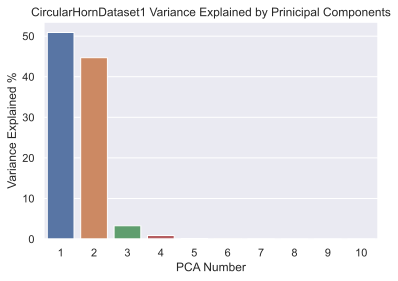

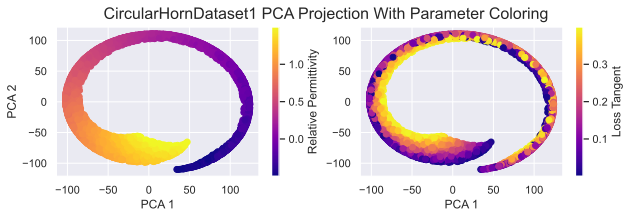

In [133]:
from ssapp.visualization.PCA_Visualisation import plotParameterColoredLatentSpace, plotPCAVariance
from ssapp.Utils import genModelComparison
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA



plotPCAVariance(dataset)


plotParameterColoredLatentSpace(dataset,pca_components = (1,2),param_names = ['Relative Permittivity','Loss Tangent'],figsize = (10,2.75))



In [151]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import LinearSVR
from ssapp.data.Metrics import relRMSE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.neural_network import MLPRegressor


benchmark_models = {'Gaus. Proc.':GaussianProcessRegressor(),
                    'std_GP': Pipeline([('scaler', StandardScaler()), ('gp', GaussianProcessRegressor())]),
                    'Linear Reg.':LinearRegression()}

test_metrics = {'Mean Squared':metrics.mean_squared_error,
                'Max Error': metrics.max_error,
                'Explained Variance': metrics.explained_variance_score,
                'Realtive RMSE ': relRMSE}



df = genModelComparison(dataset, benchmark_models= benchmark_models, test_metrics=test_metrics, train_test_ratio=0.7)

C:\Users\Niels\.conda\envs\Kandidatspeciale\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [163]:
pd.options.display.float_format = '{:,.3e}'.format
print(df)

                    Gaus. Proc. Train  Gaus. Proc. Val  Perceptron Train  \
Mean Squared                8.676e-05        1.244e-04         3.160e-01   
Max Error                   5.027e-01        4.593e-01         1.930e+01   
Explained Variance          1.000e+00        1.000e+00         8.844e-01   
Realtive RMSE               5.634e-03        6.720e-03         3.729e-01   

                    Perceptron Val  std_GP Train  std_GP Val  \
Mean Squared             3.162e-01     3.311e-05   9.769e-05   
Max Error                1.928e+01     4.723e-01   9.939e-01   
Explained Variance       8.852e-01     1.000e+00   1.000e+00   
Realtive RMSE            3.711e-01     3.480e-03   5.955e-03   

                    Linear Reg. Train  Linear Reg. Val  
Mean Squared                1.789e+00        1.819e+00  
Max Error                   3.076e+01        3.056e+01  
Explained Variance          3.454e-01        3.397e-01  
Realtive RMSE               1.376e+00        1.410e+00  


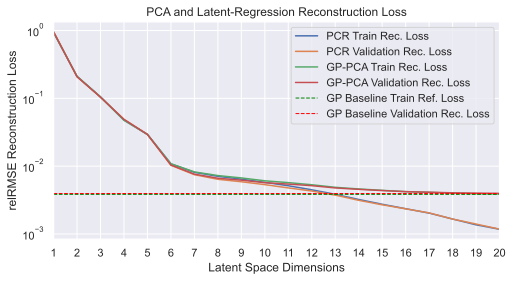

In [161]:
from ssapp.visualization.PCA_Visualisation import plotGPvsPCADimensions

plotGPvsPCADimensions(dataset,max_number_pca = 20)



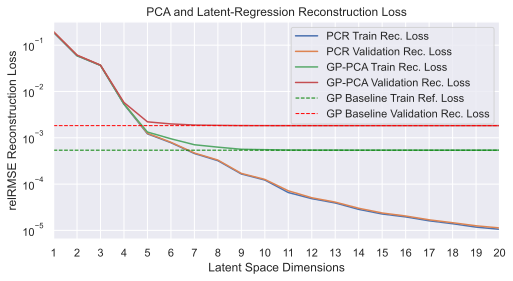

In [162]:
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
patch_dataset = load_serialized_dataset('PatchAntennaDataset2')

plotGPvsPCADimensions(patch_dataset,max_number_pca = 20)
